In [22]:
import os
os.environ["LOGURU_LEVEL"] = "INFO"

from ect.tracking import (
    Tracker, 
    NaiveMatcher, 
    FFTTransformer, 
    FECTTransformer, 
    FECTCorrTransformer, 
    AbsoluteCartesianTracer as PositionTracer
)

from ect.helpers import SequenceImageGenerator, IdSequenceImageGenerator
from ect import Config

from typing import Callable

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import magma, gist_heat

In [23]:
g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/bag/color/{id:08d}.jpg", 10)
t = FFTTransformer()
# p = PositionTracer(transformer=t)
m = NaiveMatcher(gt=(365, 194), template_shape=(104, 72), transformer=t, thresh=0.01)

tracker = Tracker(generator=g, matcher=m)#, callback=p.callback)

In [24]:
def center(inp: np.ndarray, invfunc: Callable[[np.ndarray], np.ndarray]) -> np.ndarray:
    X, Y = inp.shape
    inp = invfunc(inp)
    out = np.zeros_like(inp)
    out[:X//2, :Y//2] = inp[X//2:, Y//2:]
    out[X//2:, :Y//2] = inp[:X//2, Y//2:]
    out[X//2:, Y//2:] = inp[:X//2, :Y//2]
    out[:X//2, Y//2:] = inp[X//2:, :Y//2]
    return out

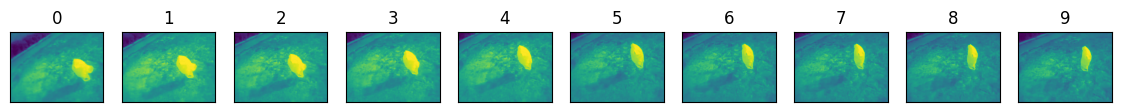

In [25]:

plt.figure(figsize=(20,5))

for idx, image in enumerate(g.images()):
    # print(idx)
    plt.subplot(1, 14, idx+1)
    plt.title(idx)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

ic| dy: 222, dx: 277
ic| dy: 347, dx: 76
ic| dy: 335, dx: 87
ic| dy: 308, dx: 98
ic| dy: 292, dx: 99
ic| dy: 295, dx: 93
ic| dy: 296, dx: 94
ic| dy: 300, dx: 

newpos: x=37, y=42
newpos: x=316, y=167
newpos: x=327, y=155
newpos: x=338, y=128
newpos: x=339, y=112
newpos: x=333, y=115
newpos: x=334, y=116


97
ic| dy: 307, dx: 106


newpos: x=337, y=120
newpos: x=346, y=127


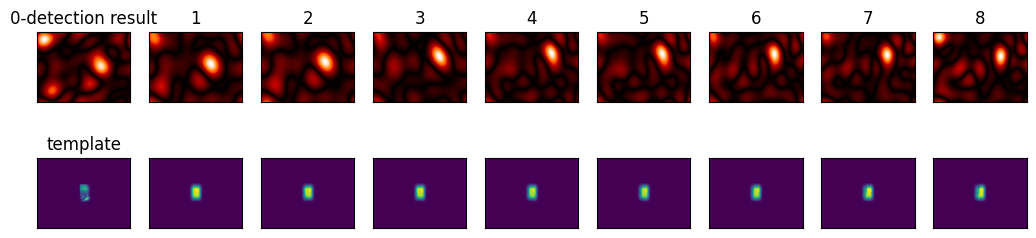

In [26]:
plt.figure(figsize=(20,3))

for idx, images in enumerate(tracker.track()):

    plt.subplot(2, 14, idx+1)
    plt.imshow(center(images[1], lambda x: np.abs(np.fft.ifft2(x))), cmap=gist_heat)
    plt.xticks([])
    plt.yticks([])
    if idx == 0:
        plt.title(f"{idx}-detection result")
    else:
        plt.title(str(idx))

    plt.subplot(2, 14, 15+idx)
    plt.imshow(images[2])
    plt.xticks([])
    plt.yticks([])
    if idx == 0:
        plt.title("template")


In [27]:
g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/bag/color/{id:08d}.jpg", 10)

t = FECTCorrTransformer(Config(offset_value_px=5), (180, 50))
# p = PositionTracer(transformer=t)
m = NaiveMatcher(
    gt=(365, 194), 
    template_shape=(150, 80), 
    transformer=t, thresh=0.1, logpolar=True, offset=5)

ic| dy: 176, dx: 4
ic| x: 372, y: 194
ic| dy: 176, dx: 4
ic| x: 379, y: 194
ic| dy: 177, dx: 3
ic| x: 385, y: 194
ic| dy: 177, dx: 3
ic| x: 391, y: 194
ic| dy: 176, dx: 3
ic| x: 397, y: 194
ic| dy: 176, dx: 3
ic| x: 403, y: 194
ic| dy: 176, dx: 3
ic| x: 409, y: 194
ic| dy: 176, dx: 3
ic| x: 415, y: 194
ic| dy: 16, dx: 0
ic| x: 410, y: 194


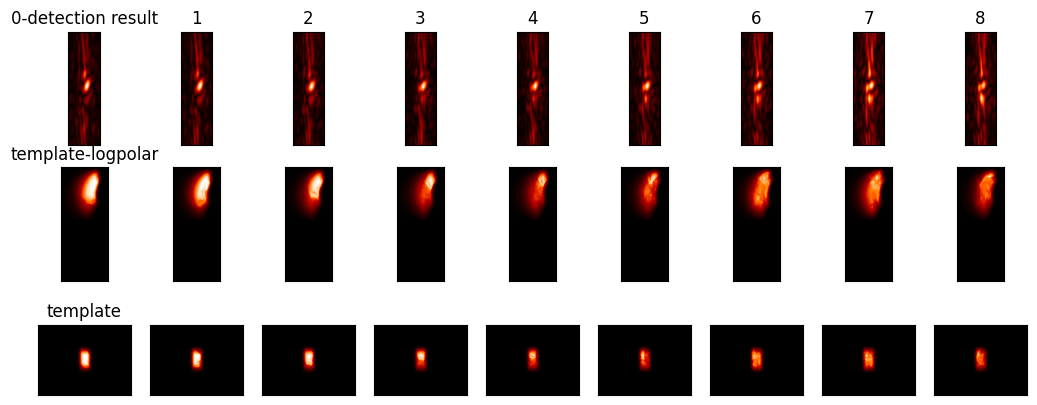

In [28]:
from ect import logpolar_new

tracker = Tracker(generator=g, matcher=m)

plt.figure(figsize=(20,5))

# inv = lambda x: ilogpolar_new(np.abs(np.fft.ifft2(x)), (400, 400), 200, Config(start_angle_deg=0, offset_value_px=0))
inv = lambda x: np.abs(np.fft.ifft2(x))

for idx, images in enumerate(tracker.track()):
    # print(idx)
    plt.subplot(3, 14, idx+1)
    if idx == 0:
        plt.title(f"{idx}-detection result")
    else:
        plt.title(str(idx))
    plt.imshow(center(images[1], inv), cmap=gist_heat)
    # plt.imshow(inv(images[0]))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 14, 29+idx)
    plt.imshow(images[2], cmap=gist_heat)
    if idx == 0:
        plt.title("template")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 14, 15+idx)
    if idx == 0:
        plt.title("template-logpolar")
    plt.imshow(logpolar_new(images[2].copy(), (200, 200), (360, 150), 200, Config(offset_value_px=0)), cmap=gist_heat)
    plt.xticks([])
    plt.yticks([])


